In [2]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


<Axes: xlabel='job_title_short'>

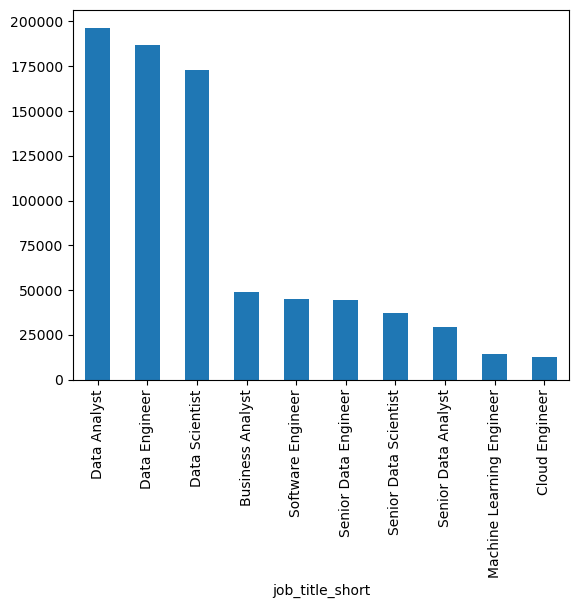

In [7]:
fig , ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar' , ax=ax)

In [11]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     703586
Contractor     34853
Internship      8748
Name: count, dtype: int64

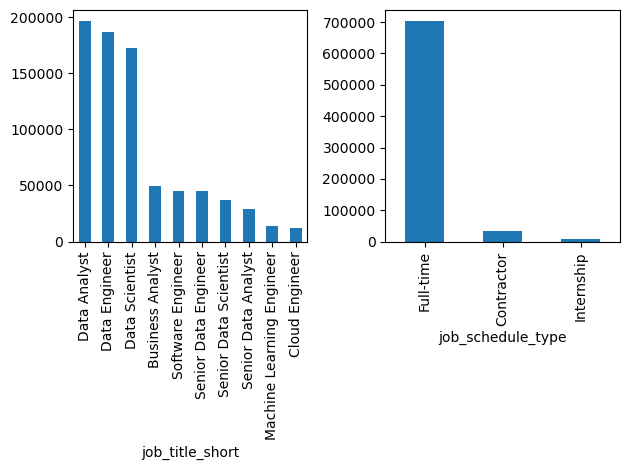

In [17]:
fig , ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar' , ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

plt.tight_layout()



<BarContainer object of 3 artists>

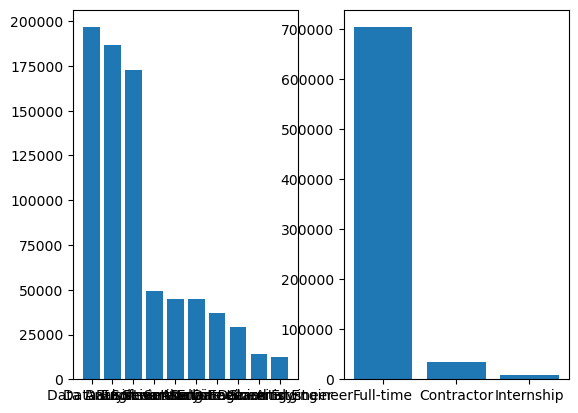

In [19]:
fig,ax=plt.subplots(1,2)

ax[0].bar(df['job_title_short'].value_counts().index,df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index,df['job_schedule_type'].value_counts().head(3))


# Example - Counts of Top Skills in Job Posting 

In [3]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by='skill_count', ascending = False , inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1481,python,Data Scientist,114016
1823,sql,Data Engineer,113375
1480,python,Data Engineer,108265
1822,sql,Data Analyst,92628
1824,sql,Data Scientist,79174
...,...,...,...
835,ionic,Business Analyst,1
798,heroku,Senior Data Analyst,1
2174,webex,Senior Data Scientist,1
2176,wimi,Data Scientist,1


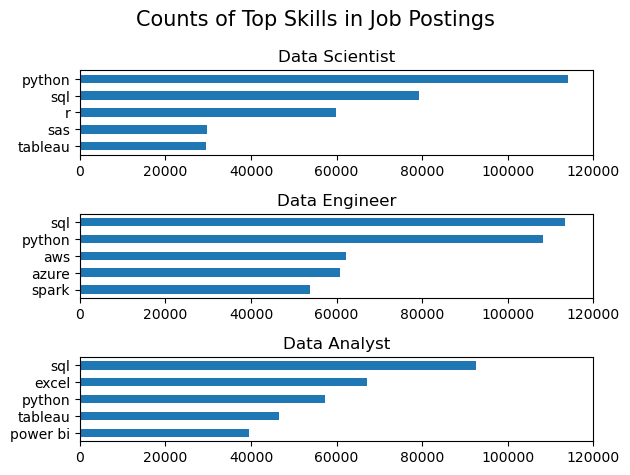

In [9]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']  # or use .unique().tolist()

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)

    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle("Counts of Top Skills in Job Postings",fontsize=15)
fig.tight_layout()

